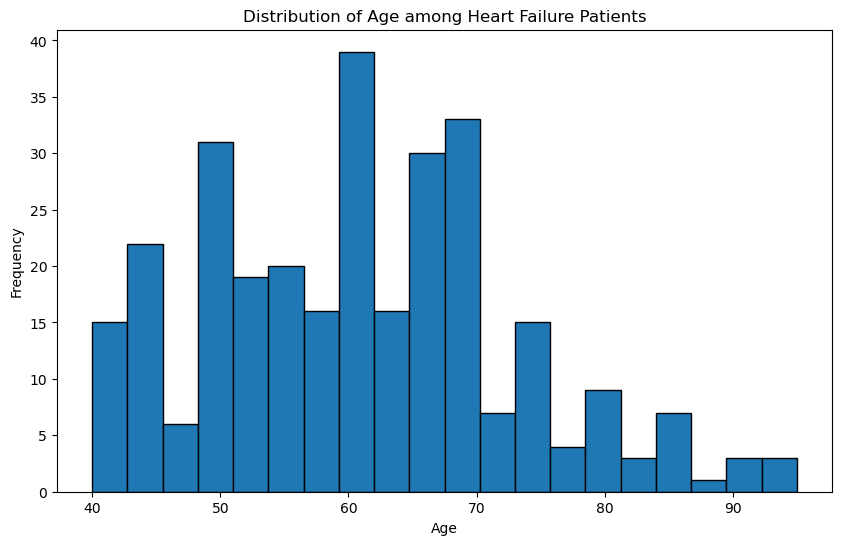

'\n    The histogram shows that the ages of patients are spread across a range, with a notable concentration in the 60-70 age range\n'

In [2]:

#Q1.  What is the distribution of age among heart failure patients in the dataset?



import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(file_path)

# Plot the distribution of age
plt.figure(figsize=(10, 6))
df['age'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Age among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


'''
    The histogram shows that the ages of patients are spread across a range, with a notable concentration in the 60-70 age range
'''




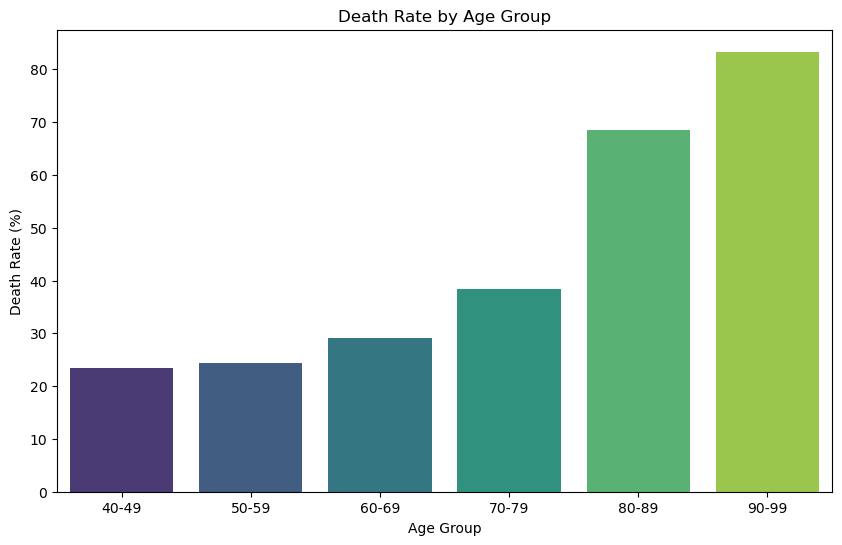

age_group
40-49    23.404255
50-59    24.390244
60-69    29.032258
70-79    38.461538
80-89    68.421053
90-99    83.333333
Name: DEATH_EVENT, dtype: float64


'\n    - As observed, the death rate tends to increase with age, with a particularly sharp rise in the 80-89 and 90-99 age groups\n'

In [4]:

#Q2.  How does the death rate vary with age?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file_path)

# Define age groups
bins = [40, 50, 60, 70, 80, 90, 100]
labels = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)


death_rate_age_group = data.groupby('age_group')['DEATH_EVENT'].mean() * 100


plt.figure(figsize=(10, 6))
sns.barplot(x=death_rate_age_group.index, y=death_rate_age_group.values, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate by Age Group')
plt.show()


print(death_rate_age_group)

'''
    - As observed, the death rate tends to increase with age, with a particularly sharp rise in the 80-89 and 90-99 age groups
'''



In [6]:

#Q3. What is the percentage of male and female patients in the dataset?


import pandas as pd


file_path = 'heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file_path)


sex_distribution = data['sex'].value_counts(normalize=True) * 100

sex_distribution.index = ['Male', 'Female']


print(sex_distribution)



Male      64.882943
Female    35.117057
Name: sex, dtype: float64


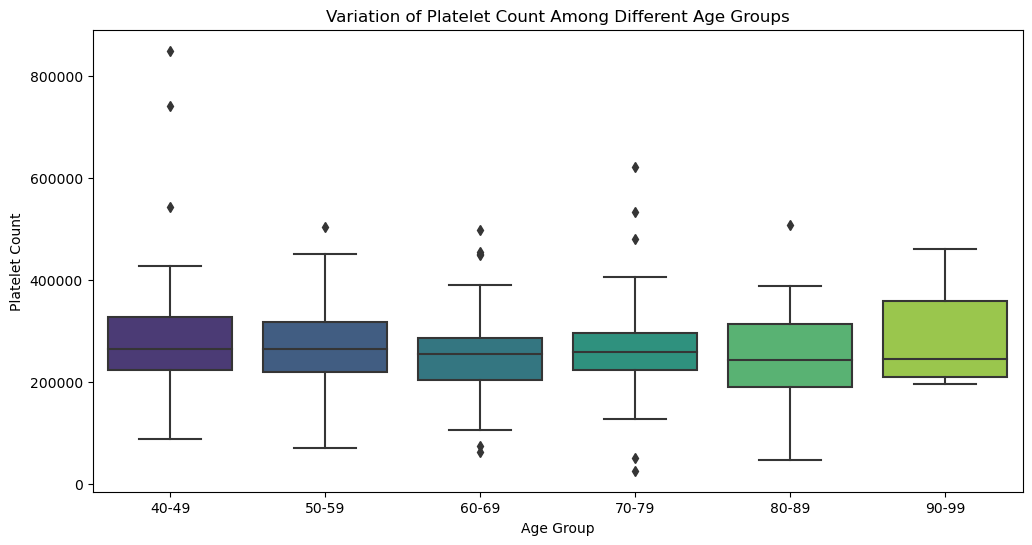

           count           mean            std       min       25%  \
age_group                                                            
40-49       47.0  285931.705319  141518.402154   87000.0  222000.0   
50-59       82.0  265001.807073   83484.172827   70000.0  218250.0   
60-69       93.0  248990.840645   76019.870854   62000.0  204000.0   
70-79       52.0  267036.349038  101173.880709   25100.0  222250.0   
80-89       19.0  252248.213684  105430.556160   47000.0  189000.0   
90-99        6.0  290059.671667  109798.700540  196000.0  209500.0   

                  50%          75%       max  
age_group                                     
40-49      263358.030  326500.0000  850000.0  
50-59      263358.030  317750.0000  504000.0  
60-69      254000.000  286000.0000  497000.0  
70-79      259179.015  296000.0000  621000.0  
80-89      243000.000  313500.0000  507000.0  
90-99      244679.015  358339.5075  461000.0  


In [7]:

#q4. How does the platelet count vary among different age groups

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file_path)


bins = [40, 50, 60, 70, 80, 90, 100]
labels = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='platelets', data=data, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.title('Variation of Platelet Count Among Different Age Groups')
plt.show()


platelet_summary = data.groupby('age_group')['platelets'].describe()
print(platelet_summary)


Pearson correlation coefficient between serum creatinine and serum sodium: -0.1890952100911741


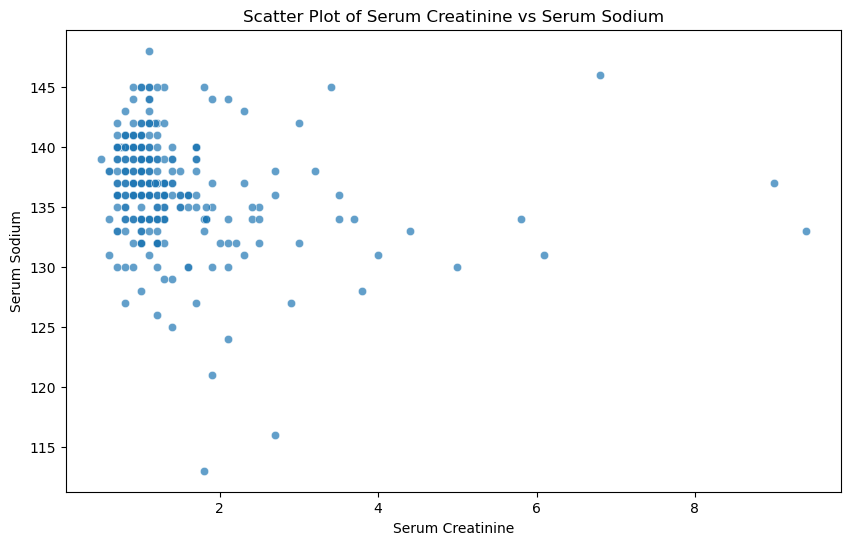

In [9]:

#Q5.Is there a correlation between creatinine and sodium levels in the blood?


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file_path)


correlation = data['serum_creatinine'].corr(data['serum_sodium'])
print(f'Pearson correlation coefficient between serum creatinine and serum sodium: {correlation}')

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='serum_creatinine', y='serum_sodium', data=data, alpha=0.7)
plt.xlabel('Serum Creatinine')
plt.ylabel('Serum Sodium')
plt.title('Scatter Plot of Serum Creatinine vs Serum Sodium')
plt.show()


In [10]:

#Q6. How does the prevalence of high blood pressure differ between male and female patients?


import pandas as pd


file_path = 'heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file_path)


prevalence_high_bp = data.groupby('sex')['high_blood_pressure'].mean() * 100


prevalence_high_bp.index = ['Female', 'Male']

# Display the prevalence of high blood pressure for each gender
print(prevalence_high_bp)



Female    41.904762
Male      31.443299
Name: high_blood_pressure, dtype: float64


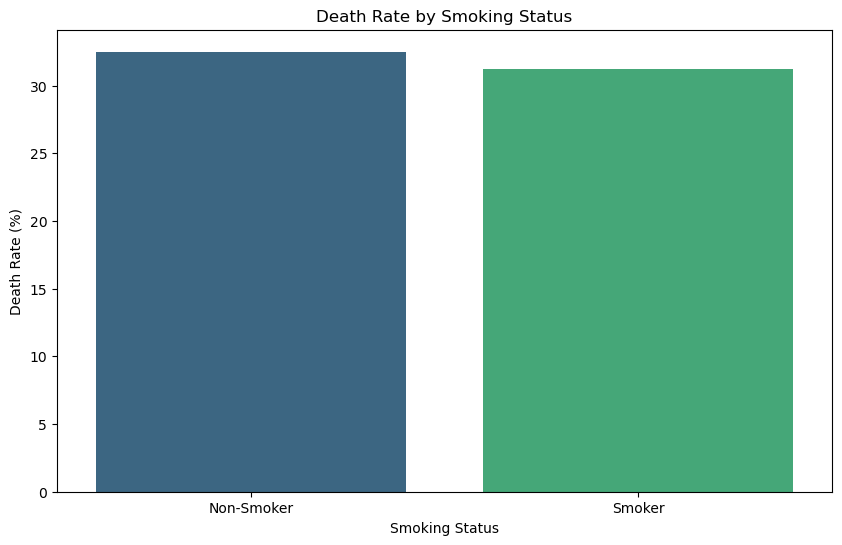

Death rate for Non-Smokers: 32.51%
Death rate for Smokers: 31.25%
Chi-square test p-value: 0.9318


In [11]:

#Q7.  What is the relationship between smoking habits and the occurrence of heart failure?


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

file_path = 'heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file_path)


death_rate_smoking = data.groupby('smoking')['DEATH_EVENT'].mean() * 100
death_rate_smoking.index = ['Non-Smoker', 'Smoker']

# Perform chi-square test
contingency_table = pd.crosstab(data['smoking'], data['DEATH_EVENT'])
chi2, p, _, _ = chi2_contingency(contingency_table)


plt.figure(figsize=(10, 6))
sns.barplot(x=death_rate_smoking.index, y=death_rate_smoking.values, palette='viridis')
plt.xlabel('Smoking Status')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate by Smoking Status')
plt.show()

# Display the results
print(f'Death rate for Non-Smokers: {death_rate_smoking["Non-Smoker"]:.2f}%')
print(f'Death rate for Smokers: {death_rate_smoking["Smoker"]:.2f}%')
print(f'Chi-square test p-value: {p:.4f}')



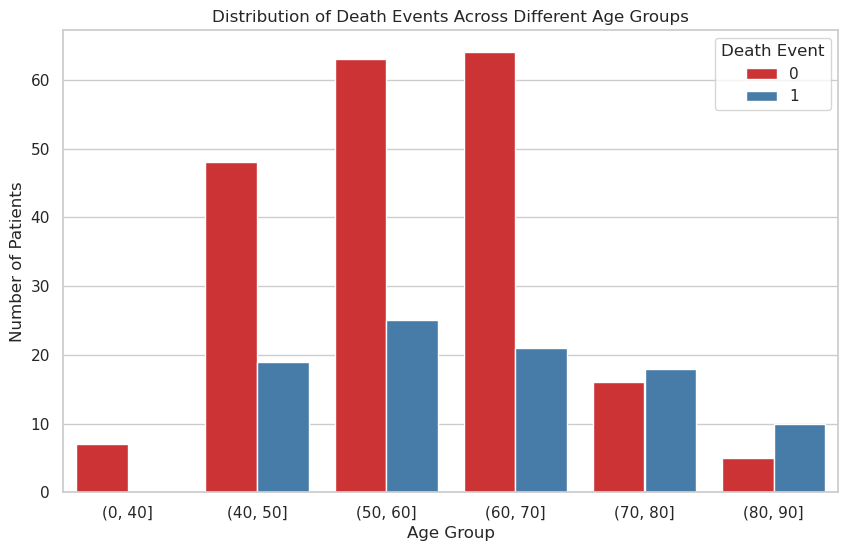

In [12]:

#Q8. Are there any noticeable patterns in the distribution of death events across different age groups?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


age_bins = [0, 40, 50, 60, 70, 80, 90]
data['age_group'] = pd.cut(data['age'], bins=age_bins)


plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='DEATH_EVENT', data=data, palette='Set1')
plt.title('Distribution of Death Events Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.legend(title='Death Event', loc='upper right')
plt.show()

'''
- The age group 60-70 has the highest number of patients, both who survived and who experienced death events.
- There is a noticeable number of death events in the age groups 50-60 and 60-70.
- The age group 40-50 has fewer death events compared to older age groups.
- There are fewer patients in the younger age groups (0-40) and older age groups (70-90), with corresponding fewer death events.
- These patterns suggest that middle-aged and older patients (50-70) have a higher incidence of death events in this dataset.
'''


Mean Ejection Fraction (Patients with Diabetes): 38.016
Mean Ejection Fraction (Patients without Diabetes): 38.132183908045974
T-statistic: -0.08358970647234736
P-value: 0.9334389630426103


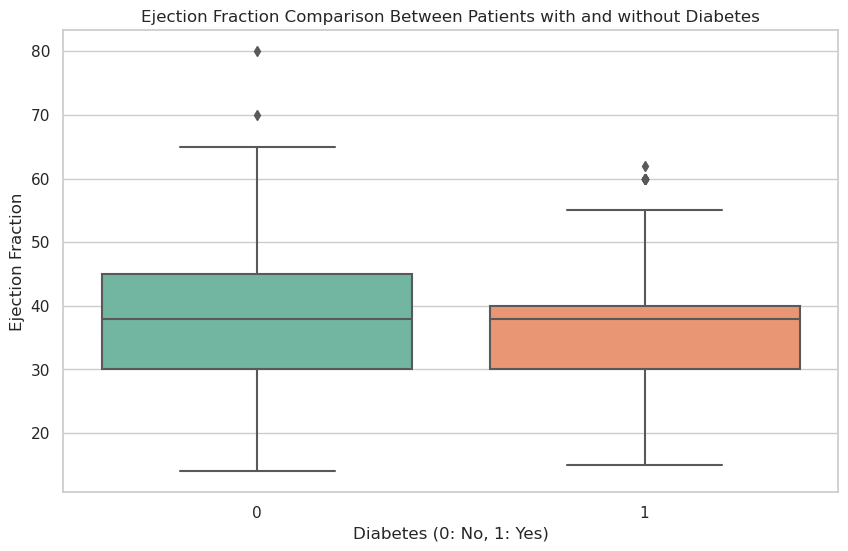

In [13]:

#Q9. Is there any significant difference in ejection fraction between patients with and without diabetes?

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns




diabetes_yes = data[data['diabetes'] == 1]['ejection_fraction']
diabetes_no = data[data['diabetes'] == 0]['ejection_fraction']


t_stat, p_value = stats.ttest_ind(diabetes_yes, diabetes_no)

# Calculate the mean ejection fraction for both groups
mean_ejection_fraction_yes = diabetes_yes.mean()
mean_ejection_fraction_no = diabetes_no.mean()

print(f"Mean Ejection Fraction (Patients with Diabetes): {mean_ejection_fraction_yes}")
print(f"Mean Ejection Fraction (Patients without Diabetes): {mean_ejection_fraction_no}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='ejection_fraction', data=data, palette='Set2')
plt.title('Ejection Fraction Comparison Between Patients with and without Diabetes')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Ejection Fraction')
plt.show()




Mean Serum Creatinine Level (Survived): 1.1848768472906404
Mean Serum Creatinine Level (Not Survived): 1.8358333333333334
T-statistic: -5.306457599754319
P-value: 2.1901978548979685e-07


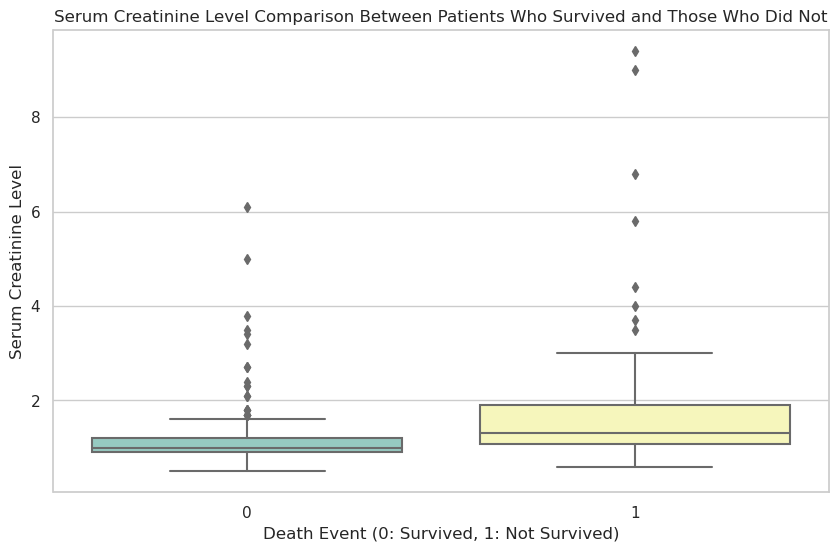

In [14]:

#Q10.  How does the serum creatinine level vary between patients who survived and those who did not?


import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



survived = data[data['DEATH_EVENT'] == 0]['serum_creatinine']
not_survived = data[data['DEATH_EVENT'] == 1]['serum_creatinine']


mean_serum_creatinine_survived = survived.mean()
mean_serum_creatinine_not_survived = not_survived.mean()

print(f"Mean Serum Creatinine Level (Survived): {mean_serum_creatinine_survived}")
print(f"Mean Serum Creatinine Level (Not Survived): {mean_serum_creatinine_not_survived}")


t_stat, p_value = stats.ttest_ind(survived, not_survived)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=data, palette='Set3')
plt.title('Serum Creatinine Level Comparison Between Patients Who Survived and Those Who Did Not')
plt.xlabel('Death Event (0: Survived, 1: Not Survived)')
plt.ylabel('Serum Creatinine Level')
plt.show()
